assignment_3_linear_regression

In [1]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#1 linear regression works finding a line that best fits the datapoints available on the plot.


In [2]:
df = pd.read_csv('Data Mashable.csv') # import df

In [3]:
df.head() #display head

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [4]:
df.info() # overview to see data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             24999 non-null  int64  
 1   url                            24999 non-null  object 
 2   n_tokens_title                 24999 non-null  int64  
 3   n_tokens_content               24999 non-null  int64  
 4   num_imgs                       24999 non-null  int64  
 5   num_videos                     24999 non-null  int64  
 6   average_token_length           24999 non-null  float64
 7   data_channel_is_lifestyle      24999 non-null  int64  
 8   data_channel_is_entertainment  24999 non-null  int64  
 9   data_channel_is_bus            24999 non-null  int64  
 10  data_channel_is_socmed         24999 non-null  int64  
 11  data_channel_is_tech           24999 non-null  int64  
 12  data_channel_is_world          24999 non-null 

In [5]:
df.isnull().values.any() # check for nan values

False

#2 for subsetting its important to first see the correlations among the different variables

In [6]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


#2 it must be noted that there are no major correlations among variables, therefore the variables will be selected according to numerical data which is needed for a predictive model to work.

In [7]:
df.head(2)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751


In [8]:
#2.1 _ subsetting

In [9]:
df_subset = df[['n_tokens_title', 'global_sentiment_polarity', 'is_weekend','global_subjectivity', 'title_subjectivity','shares_log']]

#3 Defining the independent and dependent variables for training set.

In [10]:
X = df[['n_tokens_title', 'global_sentiment_polarity', 'is_weekend','global_subjectivity', 'title_subjectivity']]
y = df['shares_log']

In [11]:
#3.2 exploratory analysis of relations between dependent and independent variables

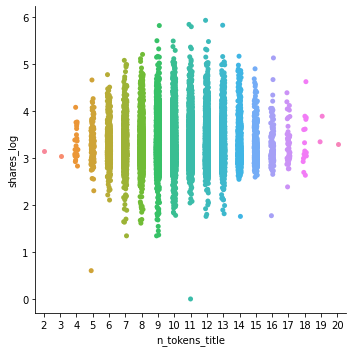

In [12]:
sns.catplot(x="n_tokens_title", y="shares_log", data=df_subset) # fig 1

3.2  it can be noted the  graph is distributed centrally among the values. There are some outliers with must be cleaned for improving the results of the model. 

In [13]:
#3 selecting the training and test size.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =1)

In [15]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 3.11 + -0.00X


In [16]:
# getting coefficients

In [17]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.002546,n_tokens_title
0.120392,global_sentiment_polarity
0.131147,is_weekend
0.273326,global_subjectivity
0.043723,title_subjectivity


In [18]:
# now we can predict use the model and evaluate it with the R2


In [19]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.02176030239206772

The R^2 is 0.021, which means 2.1% of the variation in movie scores is explained by the model. This is a very low value and can be improved wsing other relevant columns

In [20]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4015895982575051

The RMSE is 0.40. Which means that we are typically about 0.39 off in our predicted rating (which goes from 0-10).

In [21]:
# visualizing the linear regression will help to spot the reasons why the RMSE and R2 could be that low.

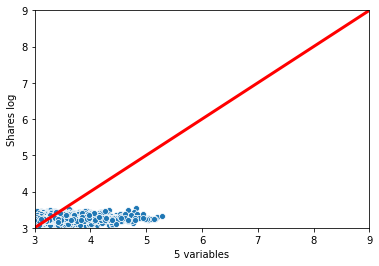

In [22]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('5 variables')
plt.ylabel('Shares log')
plt.xlim([3,9]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) #Plot a diagonal length
plt.show()

so basically the variables are below the line, what means the prediction is off It could be that there are outliers by each column which push the values down. In genreal terms the model is not working well. THis could be also because of very low correlation among variables, which in the end make for the model harder to find patterns.